# 9_Multicollinearity-Ridge Regression

## 背景描述

由于多重共线性的问题本质上在于 $|X^{'}X|\approx 0$, 因此岭回归的本质就是在这个矩阵上做了手脚, 使得多重共线性的问题得到一定的缓解.  
这里我们建立一元线性回归模型: $y=8+3*x_1+4*x_2+5*x_3+1*x_4+\epsilon$, 我们人工给定 10 个值和 10 个满足正态分布的 $\epsilon$, 使得其中 $x_3, x_4$ 具有强线性相关性.  
由此我们构造了 10 个观测的 4 个变量，具体请见下表：

## 数据描述

|    var     |         1         |         2          |         3          |         4          |         5         |         6         |         7          |         8          |         9         |        10         |
| :--------: | :---------------: | :----------------: | :----------------: | :----------------: | :---------------: | :---------------: | :----------------: | :----------------: | :---------------: | :---------------: |
|     X1     | 5.053499791495376 | 4.896359188149629  | 4.5846019652366765 | 3.4627703344989245 | 3.270451004372899 | 4.493105477608886 | 4.4464566375800425 | 4.798063216845086  | 6.427862171550048 | 4.303787732779672 |
|     X2     | 5.072933009683874 | 3.6512177680206648 | 5.577820866295013  | 4.068646005580284  | 5.59613146647269  | 6.323457817901293 | 6.079773035399383  | 2.9443980328330173 | 4.457913906178166 | 5.357206466723423 |
|     X3     |        1.1        |        1.4         |        1.7         |        1.7         |        1.8        |        1.8        |        1.9         |         2          |        2.3        |        2.4        |
|     X4     |        2.2        |         3          |        3.6         |        3.4         |        3.8        |        3.6        |        3.6         |        4.2         |        4.8        |         5         |
| $\epsilon$ |    0.05290865     |    -0.34306401     |     -0.5598349     |     0.64584319     |    -0.37267585    |    -0.87090483    |     0.99051878     |    -1.38493147     |    0.06964761     |     0.0842377     |
|     Y      |    51.20514006    |    46.95088463     |    55.60525446     |    47.20873822     |                   |                   |                    |                    |                   |                   |

## 参数设置如下:   

1. 样本量 n = 10
2. 变量个数 p = 4
3. 自变量 $x_1$ 的波动 $\sigma_{x_1}=1$
4. 误差的波动 $\sigma_y=1$

## 问题 

1. 判断所给数据是否具有多重共线性.
2. 若具有多重共线性, 选择适当的岭参数.
3. 进行岭回归分析.

## 解决方案

**Q1：** 

**仿真实验**

In [1]:
# Import standard packages
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Import additional packages
from itertools import combinations
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import linear_model  # 进行岭回归分析
from ipywidgets import interact  # 互动功能
%matplotlib inline 

p = 4
n = 10

# 上帝视角下的beta: 截距项为 8，三个变量前的系数分别为 3, 4, 5, 1
beta = np.array([8,3,4,5,1])

# 构造 X 矩阵
X = [[5.053499791495376, 4.896359188149629, 4.5846019652366765, 3.4627703344989245, 3.270451004372899, 4.493105477608886, 4.4464566375800425, 4.798063216845086, 6.427862171550048, 4.303787732779672]]
X.append([5.072933009683874, 3.6512177680206648, 5.577820866295013, 4.068646005580284, 5.59613146647269, 6.323457817901293, 6.079773035399383, 2.9443980328330173, 4.457913906178166, 5.357206466723423])
X.append([1.1, 1.4, 1.7, 1.7, 1.8, 1.8, 1.9, 2, 2.3, 2.4])
X.append([2.2, 3, 3.6, 3.4, 3.8, 3.6, 3.6, 4.2, 4.8, 5])
X.insert(0, np.ones(n))
X = np.array(X)
X = X.T 
# print(X)

# 生成 10 个满足正态分布的 epsilon 值
epsilon =  [0.05290865, -0.34306401, -0.5598349, 0.64584319, -0.37267585, -0.87090483, 0.99051878, -1.38493147, 0.06964761, 0.0842377]

# 上帝视角下的Y
Y = X @ beta + epsilon

Y = Y.T
# print(Y)

df = pd.DataFrame(X)
df['Y'] = Y
print(df.head())

     0         1         2    3    4          Y
0  1.0  5.053500  5.072933  1.1  2.2  51.205140
1  1.0  4.896359  3.651218  1.4  3.0  46.950885
2  1.0  4.584602  5.577821  1.7  3.6  55.605254
3  1.0  3.462770  4.068646  1.7  3.4  47.208738
4  1.0  3.270451  5.596131  1.8  3.8  52.623203


**对原始数据进行多元线性回归分析**

In [2]:
model= sm.OLS(Y, X).fit()
Y_hat = model.fittedvalues
beta_hat = model.params
model.summary()

C:\Users\dell\AppData\Roaming\Python\Python37\site-packages\scipy\stats\stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     136.9
Date:                Mon, 03 May 2021   Prob (F-statistic):           2.71e-05
Time:                        14:54:43   Log-Likelihood:                -7.6024
No. Observations:                  10   AIC:                             25.20
Df Residuals:                       5   BIC:                             26.72
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.6965      2.132      3.610      0.015       2.215      13.178
x1             2.9804      0.291     10.242      0.000       2.232       3.728
x2             3.9880      0.256     15.574      0.000       3.330       4.646
x3            11.7516      4.308      2.728      0.041       0.679      22.825
x4            -2.2089      2.025     -1.091      0.325      -7.414       2.996
==============================================================================
Omnibus:                        4.689   Durbin-Watson:                   2.417
Prob(Omnibus):                  0.096   Jarque-Bera (JB):                2.404
Skew:                          -1.199   Prob(JB):                        0.301
Kurtosis:                       2.864   Cond. No.                         164.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**对数据标准化:**

In [3]:
# 对数据进行标准化
# 自变量 X 的均值
X_mean = []
for i in range(p):
    X_mean.append(np.mean(X[:, i+1])) 

# 自变量 X 的标准差
X_L = []
for i in range(p):
    X_L.append(sum((X[:, i+1] - X_mean[i]) ** 2))  

# 对自变量 X 标准化(截距项不用标准化)
X_std = X * 1.0
X_std[:,1:p+1] = (X[:,1:p+1] - X_mean) / np.sqrt(X_L)

# 对因变量 Y 标准化
Y_L = sum((Y - np.mean(Y))**2)
Y_std = (Y - np.mean(Y)) / np.sqrt(Y_L)

df_std = pd.DataFrame(X_std)
df_std['Y'] = Y_std
print(df_std.head())

     0         1         2         3         4         Y
0  1.0  0.183312  0.048525 -0.615880 -0.619712 -0.160929
1  1.0  0.123276 -0.382698 -0.355649 -0.293548 -0.408185
2  1.0  0.004167  0.201663 -0.095418 -0.048925  0.094805
3  1.0 -0.424436 -0.256087 -0.095418 -0.130466 -0.393199
4  1.0 -0.497913  0.207217 -0.008674  0.032616 -0.078512


**对标准化后的数据进行多元线性回归分析**

In [4]:
# Do the multiple linear regression——对标准化后的数据
model_std = sm.OLS(Y_std, X_std).fit()
beta_std_hat = model_std.params
Y_std_hat = model_std.fittedvalues
model_std.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     136.9
Date:                Mon, 03 May 2021   Prob (F-statistic):           2.71e-05
Time:                        14:54:51   Log-Likelihood:                 20.850
No. Observations:                  10   AIC:                            -31.70
Df Residuals:                       5   BIC:                            -30.19
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.192e-16      0.013   2.37e-14      1.000      -0.035       0.035
x1             0.4534      0.044     10.242      0.000       0.340       0.567
x2             0.7642      0.049     15.574      0.000       0.638       0.890
x3             0.7874      0.289      2.728      0.041       0.045       1.529
x4            -0.3149      0.289     -1.091      0.325      -1.057       0.427
==============================================================================
Omnibus:                        4.689   Durbin-Watson:                   2.417
Prob(Omnibus):                  0.096   Jarque-Bera (JB):                2.404
Skew:                          -1.199   Prob(JB):                        0.301
Kurtosis:                       2.864   Cond. No.                         30.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**求 $(X^*)^{'}(X^*)$ 矩阵的特征值和特征向量:**

In [5]:
# (X*)'(X*) 矩阵等价于原始矩阵 X 样本相关矩阵
R = df.corr()
R = R.iloc[1:-1,1:-1]

R

,1,2,3,4
1,1.000000,-0.225151,0.146603,0.167910
2,-0.225151,1.000000,0.045426,-0.032975
3,0.146603,0.045426,1.000000,0.985999
4,0.167910,-0.032975,0.985999,1.000000


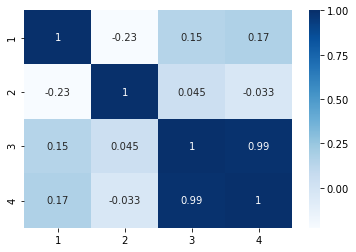

In [6]:
ax = sns.heatmap(R, cmap='Blues', annot=True) # annot: 在heatmap中每个方格写入数据
# bottom, top = ax.get_ylim()
# ax.set_ylim(bottom + 0.5, top - 0.5)

In [7]:
# 求特征值 & 特征向量
W, V = np.linalg.eig(R)
W_diag = np.diag(W)
V = V.T # 这里需要转置
print('特征值: ', W)

特征值:  [2.03537021 1.20052604 0.7532161  0.01088765]


**判断 X 矩阵是否具有多重共线性:**

In [8]:
# 定义"判断多重共线性"的函数
# 参数: (X_list: 设计矩阵 X, thres_vif: VIF 方法判断多重共线性的阈值, thres_kappa: 特征值方法判断多重共线性的阈值)
def judge_col(X_list, thres_vif, thres_kappa): 
    var_num = X_list.shape[1]
    print('VIF方法判断结果(阈值为 %d): '% thres_vif)
    vif = [variance_inflation_factor(X_list, i) for i in range(var_num)]
    for i in range(var_num):
        if vif[i] >= thres_vif:
            print('设计矩阵 X 存在多重共线性.')
            break
        elif i == var_num-1:
            print('设计矩阵 X 不存在多重共线性.')

    print('\n特征值判定法判断结果(阈值为 %d): '% thres_kappa)
    kappa = []
    for i in range(var_num):
        kappa.append(np.sqrt(max(W) / W[i]))
    if np.max(kappa) >= thres_kappa:
        print('设计矩阵 X 存在多重共线性，其中kappa值为：%.4f'% np.max(kappa))
    else:
        print('设计矩阵 X 不存在多重共线性，其中kappa值为：%.4f'% np.max(kappa))

# 判断多重共线性
X_std1 = X_std[:,1:p+1] # 将 X 矩阵的截距项去掉
beta_std_hat1 = beta_std_hat[1:p+1] # 将 β_0 去掉 
judge_col(X_std1, 5, 10) # 判断多重共线性

VIF方法判断结果(阈值为 5): 
设计矩阵 X 存在多重共线性.

特征值判定法判断结果(阈值为 10): 
设计矩阵 X 存在多重共线性，其中kappa值为：13.6727


**Q2:**  
岭参数 $k$ 选择(模型选择)的方法:   
1. 岭迹法
2. 方差扩大因子法
3. 霍尔-肯纳德（Hoerl-Kennad）公式
4. Mcdorard-Garaneau 公式

1. 岭迹法  
岭迹法的一般原则:   
· 系数岭估计基本稳定;    
· 最小二乘回归下符号不合理的回归系数, 在岭估计的意义下符号变得合理;    
· 回归系数合乎经济意义;  
· 残差平方和不会增大太多.

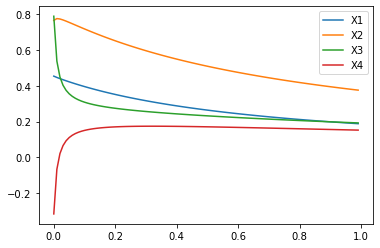

In [9]:
# [0, 1) 范围内划分的最大精细程度: [0,0.01,0.02,...,0.99]
range_const1 = 100

def RR1(K = 1):
    # 计算岭估计
    rang1 = []
    for i in range(K):
        rang1.append(i/K) # 岭参数 k 取值范围: [0,1-1/K](例如 K=10, k 取值范围: [0, 0.9])
    coefs_1 = []
    for k in rang1:
        temp1 = np.linalg.inv(X_std1.T @ X_std1 + k * np.eye(p)) @ X_std1.T @ Y_std
        coefs_1.append(temp1)

    # 画图
    # print('参数的数值: ', coefs_1)
    coefs_1 = np.array(coefs_1)
    for i in range(p):
        plt.plot(rang1, coefs_1[:,i], label = 'X%d'%(i+1))
    plt.legend(loc = 'best')

# 随着 K 值的增加, 岭参数 k 取值越精细, 因为在 [0,1) 范围内的分割更细
# 取特定的100
# interact(RR1,K=(1,range_const1))
RR1(100)

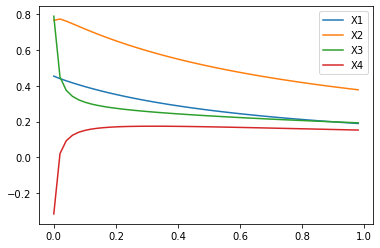

In [10]:
# 调包: linear_model 
def RR2(K = 1): 
    # 初始化一个Ridge Regression
    clf = linear_model.Ridge(fit_intercept=False)

    # 训练模型: 测试不同的 k 取值，获得系数
    rang2 = []
    for i in range(K):
        rang2.append(i/K)
    coefs_2 = []
    for k in rang2:
        clf.set_params(alpha=k)
        clf.fit(X_std1, Y_std)
        coefs_2.append(clf.coef_)

    # 画图
    # print('参数的数值: ', coefs_2)
    coefs_2 = np.array(coefs_2)
    for i in range(p):
        plt.plot(rang2, coefs_2[:,i], label = 'X%d'%(i+1))   
    plt.legend(loc = 'best')

# interact(RR2,K=(1,range_const1))
# 取特定的50
RR2(50)

岭参数为:  485165195.4097903
对应的岭估计:  [1.92676680e-09 3.96808493e-09 3.23892750e-09 2.87091363e-09]


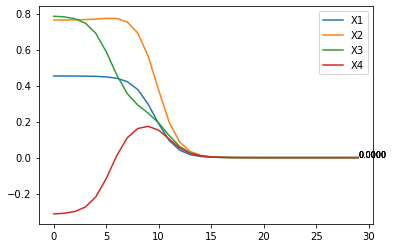

In [11]:
# 岭参数 k 的最大取值范围: [exp(-10),exp(19)]
range_const2 = 30

def RR3(K = 1):
    # 初始化一个Ridge Regression
    clf = linear_model.Ridge(fit_intercept=False)
    
    # 训练模型: 测试不同的 k 取值，获得系数
    coefs_3 = []
    num_lambda3 = K
    for k in range(num_lambda3):
        clf.set_params(alpha=np.exp(k-10))  # 岭参数 k 取值范围: [exp(-10),exp((K-1)-10)]
        clf.fit(X_std1, Y_std)
        coefs_3.append(clf.coef_)

    # 画图
    # print('参数的数值：', coefs_3)
    x3 = range(num_lambda3)
    coefs_3 = np.array(coefs_3)
    for i in range(p):
        plt.plot(x3, coefs_3[:,i], label = 'X%d'%(i+1))
        plt.text(x3[-1], coefs_3[-1,i], '%.4f' % float(coefs_3[-1,i]), fontsize=8)
    print('岭参数为: ', np.exp(K-10))
    print('对应的岭估计: ', coefs_3[-1,:])
    plt.legend(loc = 'best')

# interact(RR3,K=(1,range_const2))
# 取特定的30
RR3(30)

基于交叉验证的岭回归 alpha 选择可以直接获得一个相对不错的 alpha.

In [12]:
# 初始化一个Ridge Cross-Validation Regression
clf_cv = linear_model.RidgeCV(fit_intercept=False)
 
# 训练模型
clf_cv.fit(X_std1, Y_std)

k_cv = clf_cv.alpha_
coef_cv = clf_cv.coef_ 
print('k 的数值 : ', clf_cv.alpha_)
print('参数的数值：', clf_cv.coef_)

k 的数值 :  0.1
参数的数值： [0.39521196 0.71654002 0.30808004 0.15082594]


In [13]:
# 验证岭估计和最小二乘估计之间的关系
thres_k = int(k_cv * range_const1)
print(coef_cv)

C1 = X_std1.T @ X_std1
C2 = np.linalg.inv(C1 + k_cv * np.eye(p))
C3 = C2 @ C1
print(C3 @ beta_std_hat1)

diff = coef_cv - C3 @ beta_std_hat1
print('差异: ', diff)

[0.39521196 0.71654002 0.30808004 0.15082594]
[0.39521196 0.71654002 0.30808004 0.15082594]
差异:  [-4.99600361e-16  9.99200722e-16 -4.82947016e-15 -2.99760217e-15]


2. 方差扩大因子法

岭参数为:  0.049787068367863944
对应的岭估计:  [0.42182275 0.75320769 0.35537606 0.11051347]


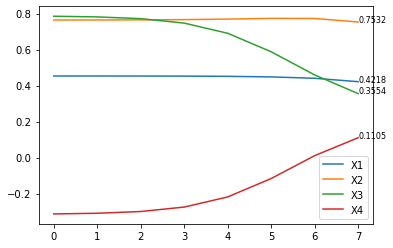

In [14]:
coefs_4 = []
thres_vif = 5
num_lambda4 = 30
judge = True
for k in range(num_lambda4):
    cnt = 0
    C = np.linalg.inv(C1 + np.exp(k-10) * np.eye(p)) @ C1 @np.linalg.inv(C1 + np.exp(k-10) * np.eye(p))
    # print(k, C)
    temp4 = np.linalg.inv(X_std1.T @ X_std1 + np.exp(k-10) * np.eye(p)) @ X_std1.T @ Y_std
    coefs_4.append(temp4)
    
    # 给定 k, 使得所有方差扩大因子 C[j][j] <= thres_vif
    for j in range(p):
        if C[j][j] < thres_vif:
            cnt += 1
        else:
            break
    if cnt == p:
        k4 = np.exp(k-10)
        print('岭参数为: ', np.exp(k-10))
        print('对应的岭估计: ', temp4)
        break

# 画图
coef_4 = temp4
# print('参数的数值：', coefs_4)
x4 = range(k+1)  # 以 k 作为横坐标
# x4 = []  # 以 np.exp(k) 作为横坐标
# for i in range(k+1):
#      x4.append(np.exp(i-10))
coefs_4 = np.array(coefs_4)
for i in range(p):
    plt.plot(x4, coefs_4[:,i], label = 'X%d'%(i+1))
    plt.text(x4[-1], coefs_4[-1,i], '%.4f' % float(coefs_4[-1,i]), fontsize=8)

plt.legend(loc = 'best')
plt.show()

3. 霍尔-肯纳德（Hoerl-Kennad）公式  

In [15]:
SSE = sum((Y_std - Y_std_hat) ** 2)
sigma2 = SSE / (n - p - 1)

Z = X_std1 @ V.T
alpha_hat = np.linalg.inv(W_diag) @ Z.T @ Y_std
# print(alpha_hat)

k_HK = sigma2 / max(alpha_hat**2)
k5 = k_HK
print('岭参数 k_HK: ', k5)
coef_5 = np.linalg.inv(X_std1.T @ X_std1 + k5 * np.eye(p)) @ X_std1.T @ Y_std
print('对应的岭估计: ', coef_5)

岭参数 k_HK:  0.0026754711436488133
对应的岭估计:  [ 0.4512857   0.76968807  0.68446324 -0.21229962]


4. Mcdorard-Garaneau 公式  
如果 $Q=||\hat{\beta}||^2-\hat{\sigma}^2\sum_{j=1}^p\lambda_j^{-1} \leq 0$，则认为 $\hat{\beta}$ 的各个分量都差不多，此时，对 $\hat{\beta}$ 不进行压缩，选择 $k = 0$

In [16]:
thres_diff = 0.2
beta_compress = beta_std_hat1.T @ beta_std_hat1 - sigma2 * sum(1/W)
if beta_compress <= 0:
    k6 = 0
    print('k = 0, 不对最小二乘估计进行压缩.')
else:
    print('Q: ', beta_compress)
    coefs_6 = []
    num_lambda6 = 30
    for k in range(num_lambda6):
        temp6 = np.linalg.inv(X_std1.T @ X_std1 + np.exp(k-10) * np.eye(p)) @ X_std1.T @ Y_std
        beta_k_compress = temp6.T @ temp6
        if abs(beta_compress-beta_k_compress) < thres_diff:
            k6 = np.exp(k-10)
            print('岭参数为: ', k6)
            print('对应的岭估计: ', temp6)
            break
coef_6 = temp6

Q:  1.337631650714245
岭参数为:  4.5399929762484854e-05
对应的岭估计:  [ 0.45334777  0.76428877  0.78521579 -0.3127196 ]


In [17]:
beta_rr = coef_cv
print('岭参数 k = ', k_cv)
print('原始的最小二乘估计 = ', beta_hat[1:p+1])
print('标准化后的最小二乘估计 = ', beta_std_hat1)
print('\n')
print('原始 beta = ', beta[1:p+1])
print('岭估计 = ', beta_rr)
print('还原岭估计 = ', beta_rr *  np.sqrt(Y_L) / np.sqrt(X_L))

岭参数 k =  0.1
原始的最小二乘估计 =  [ 2.98037623  3.98795702 11.75164845 -2.2088513 ]
标准化后的最小二乘估计 =  [ 0.45338505  0.76416227  0.78738122 -0.31487934]


原始 beta =  [3 4 5 1]
岭估计 =  [0.39521196 0.71654002 0.30808004 0.15082594]
还原岭估计 =  [2.59796903 3.73942931 4.59808825 1.05803093]


由此可知, 岭参数取值为 0.1 左右时，还原后的岭估计接近原始（上帝视角下）的 $\beta$.